In [1]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries
from keras.datasets import fashion_mnist  # Importing Fashion MNIST dataset from Keras
import numpy as np  # Importing NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib library for plotting
import wandb
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib
import seaborn as sns
import pandas

In [ ]:
!wandb login 57566fbb0e091de2e298a4320d872f9a2b200d12

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
wandb.init(project="DL_Assignment1", name="Question:1")

# **Question-1**

In [3]:
#loading data set
(fashion_mnist_train, fashion_mnist_train_label), (fashion_mnist_test, fashion_mnist_test_label) = fashion_mnist.load_data()
(mnist_train, mnist_train_label), (mnist_test, mnist_test_label) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Checking Dataset shape
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# type(x_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
# x_train.shape

def input_matrix(image):
    """
    Reshape and normalize input images.

    Parameters:
    - image: Input image

    Returns:
    - Reshaped and normalized input matrix
    """
    return image.reshape(image.shape[0], -1) / 255.0


In [5]:
# class labels for fashion mnist dataset
label_fahion_mnist = {
     0 :  "T-shirt/top",
     1 :  "Trouser",
     2 :  "Pullover",
     3 :  "Dress",
     4 :  "Coat",
     5 :  "Sandal",
     6 :  "Shirt",
     7 :  "Sneaker",
     8 :  "Bag",
     9 :  "Ankle boot"
}

label_mnist = {
     0 :  "0",
     1 :  "1",
     2 :  "2",
     3 :  "3",
     4 :  "4",
     5 :  "5",
     6 :  "6",
     7 :  "7",
     8 :  "8",
     9 :  "9"
}

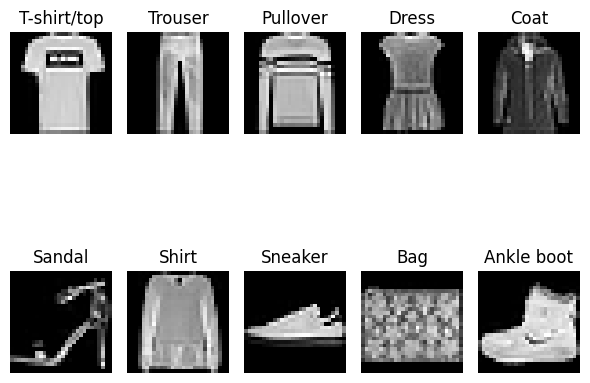

In [6]:
# Creating subplots to display one image of each class
fig, axes = plt.subplots(2, 5, figsize=(6, 6))

# Iterating through each class
for i in range(len(label_fahion_mnist)):
    row = i // 5  # Calculating row index for subplot
    col = i % 5   # Calculating column index for subplot

    # Finding the index of the first image in the training set with label i
    idx = np.argmax(fashion_mnist_train_label == i)

    # Displaying the image corresponding to the label i
    axes[row, col].imshow(fashion_mnist_train[idx], cmap='gray')  # Displaying grayscale image
    axes[row, col].set_title(label_fahion_mnist[i])  # Setting title with class label
    axes[row, col].axis('off')  # Turning off axis

    # wandb.log({"Question1": [wandb.Image(fashion_mnist_train[idx], caption= label[i])]})

# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
wandb.finish()

# **Activation Functions**

In [7]:
""" Activation Class :- Contains various diffrent activations functions """
class Activation_Functions:
    def __init__(self) -> None:
        pass


    def sigmoid(self, x):
        # Compute sigmoid element-wise for each element of the matrix
        sigmoid_x = np.zeros_like(x)  # Initialize output matrix with zeros

        # Apply the sigmoid function element-wise using vectorized operations
        positive_mask = x >= 0
        sigmoid_x[positive_mask] = 1.0 / (1.0 + np.exp(-x[positive_mask]))
        sigmoid_x[~positive_mask] = np.exp(x[~positive_mask]) / (1.0 + np.exp(x[~positive_mask]))

        return sigmoid_x


    def ReLU(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)



    def softmax(self, x):
        # Subtract the maximum value along the axis to prevent overflow
        max_x = np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x - max_x)

        # Compute softmax probabilities
        softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)

        return softmax_x

    def identity(self, x):
        return x



    def activation(self, x, fun):
        if fun == "tanh":
            return self.tanh(x)
        elif fun == "sigmoid":
            return self.sigmoid(x)
        elif fun == "ReLU":
            return self.ReLU(x)
        elif fun == "softmax":
            return self.softmax(x)
        elif fun == "identity":
            return self.identity(x)

# **Derivatives**

In [8]:
class Derivatives:
    def __init__(self) -> None:
        """
            Constructor method for Derivatives class.
            Initialization of object of Activation_Functions class
        """
        self.fun = Activation_Functions()  # Creating an instance of Activation_Functions class


    def sigmoid_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.sigmoid(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative

    def softmax_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.softmax(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative


    def tanh_derivative(self, x):
        """
        Computes the derivative of the hyperbolic tangent (tanh) activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the tanh activation function
        """
        g = self.fun.tanh(x)  # Computing tanh activation
        return 1 - g * g  # Computing and returning derivative


    def ReLU_derivative(self, x):
        """
        Computes the derivative of the Rectified Linear Unit (ReLU) activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the ReLU activation function
        """
        # g = self.fun.ReLU(x)  # Computing ReLU activation
        # return np.where(g > 0, 1, 0)  # Computing and returning derivative

        x[x>0]=1
        x[x<=0]=0
        return x

    def identity_derivative(self, x):
        x = 1
        return x


    def derivatives(self, x, activation_function):
        """
        Computes the derivative of a specified activation function.

        Parameters:
        - x: Input value
        - activation_function: Name of the activation function

        Returns:
        - Derivative of the specified activation function
        """
        if activation_function == "sigmoid":
            return self.sigmoid_derivative(x)  # Computing derivative for sigmoid activation
        elif activation_function == "tanh":
            return self.tanh_derivative(x)  # Computing derivative for tanh activation
        elif activation_function == "ReLU":
            return self.ReLU_derivative(x)  # Computing derivative for ReLU activation
        elif activation_function == "softmax":
            return self.softmax_derivative(x)
        elif activation_function == "identity":
            return self.identity_derivative(x)


# **Loss Functions**

In [9]:
class Loss_Function:
    def __init__(self) -> None:
        """
        Constructor method for Loss_Function class.
        Initializes the default loss function to cross-entropy.
        """
        self.default_loss_function = "cross_entropy"


    def compute_loss(self, y_true, y_hat, loss_function):
        """
        Computes the loss based on the given true labels and predicted probabilities.

        Parameters:
        - y_true: True labels (one-hot encoded)
        - y_hat: Predicted probabilities
        - loss_function: Name of the loss function to be used

        Returns:
        - Loss value
        """


        if loss_function == None:
            # If no loss function is specified, use the default loss function
            loss_function = self.default_loss_function

        if loss_function == "cross_entropy":
            # Set a small value epsilon to avoid numerical instability
            epsilon = 1e-15
            # Clip the predicted values to avoid log(0) and log(1) scenarios
            y_hat = np.clip(y_hat, epsilon, 1. - epsilon)
            # Compute the cross-entropy loss for each sample
            loss = -np.sum(y_true * np.log(y_hat), axis=1)
            # Compute the mean loss across all samples
            loss = np.mean(loss)
            # Return the computed loss
            return loss

        if loss_function == "mean_squared_error":
            loss = (1/2) * np.sum((y_true-y_hat)**2) / (y_hat.shape[0])
            return loss


    def last_output_derivative(self, y_hat,y_true, activation_derivative, loss_function):

        # epsilon = 1e-15
        #     # Clip the predicted values to avoid log(0) and log(1) scenarios
        # y_hat = np.clip(y_hat, epsilon, 1. - epsilon)

        if(loss_function == "mean_squared_error"):
            # print(y_hat.shape, y_true.shape)
            return (y_hat - y_true)* activation_derivative/ len(y_true)

        if(loss_function == "cross_entropy"):
            return -(y_true - y_hat)



# **Question - 2**

In [10]:
class Network:
    def __init__(self, PARAM):
        """
        Constructor method for Network class.

        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layers, output size)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store activations of each layer
        self.h = {}       # Dictionary to store outputs of each layer
        self.fun = Activation_Functions()  # Instance of Activation_Functions class
        self.size_list = [PARAM["input_size"]] + PARAM["hidden_layers"] + [PARAM["output_size"]]  # List containing sizes of all layers
        self.y_predictions = []  # List to store predicted probabilities for each input sample


    def initialize_parameters(self, initialization):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):
            if initialization == "random":
                self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
                self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values
            elif initialization == "Xavier":
                inpt_w = self.size_list[layer-1]
                opt_w = self.size_list[layer]
                inpt_b = 1
                opt_b = self.size_list[layer]

                variance_w = 2.0/(inpt_w + opt_w)
                variance_b = 2.0/(inpt_b + opt_b)

                self.weight[layer] = np.random.randn(inpt_w, opt_w) * np.sqrt(variance_w) # Initializing weights with random values
                self.bias[layer] = np.random.randn(inpt_b, opt_b) *np.sqrt(variance_b)  # Initializing biases with random values





    def forward_pass(self, x, activation_function):
        """
        Method to perform forward pass through the network.

        Parameters:
        - x: Input data
        - activation_function: Name of the activation function to be used

        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        total_layer = len(self.size_list)
        self.h[0] = x  # Input layer

        for layer in range(1, total_layer-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing preactivation
            self.h[layer] = self.fun.activation(self.a[layer], fun=activation_function)  # Applying activation function

        self.a[total_layer-1] = np.dot(self.h[layer], self.weight[total_layer-1]) + self.bias[total_layer-1]  # Computing weighted sum for final layer
        self.h[total_layer-1] = self.fun.activation(self.a[total_layer-1], fun="softmax")  # Applying softmax activation

        return self.h[total_layer-1]  # Returning output of final layer


    def predict_probability(self, dataset, activation, init):
        """
        Method to predict probabilities for each input sample in the dataset.

        Parameters:
        - dataset: Input dataset
        - activation: Name of the activation function to be used

        Returns:
        - List containing predicted probabilities for each input sample
        """
        self.initialize_parameters(init)  # Initializing network parameters

        for image in dataset:
            x = image.reshape(1, -1) / 255.0  # Reshaping and normalizing input data
            y_hat = self.forward_pass(x, activation)  # Performing forward pass
            self.y_predictions.append(y_hat)  # Storing predicted probabilities

        return self.y_predictions  # Returning list of predicted probabilities



In [11]:
PARAM = {
    "input_size" : 784,            # Size of the input layer (number of input features)
    "hidden_layers" : [5, 6, 7],   # Sizes of hidden layers in the neural network
    "output_size" : 10             # Size of the output layer (number of classes)
}

n1 = Network(PARAM)  # Creating an instance of the Network class with the given parameters
y_pred = n1.predict_probability(fashion_mnist_train, "identity", "Xavier")  # Predicting probabilities for each sample in the training dataset using sigmoid activation function



In [12]:
np.set_printoptions(suppress=True)  # Suppressing scientific notation in printed arrays
print(y_pred[0])  # Printing the predicted probabilities for the first sample

[[0.27090083 0.10786958 0.05489038 0.08487341 0.07906369 0.15581987
  0.05950726 0.08776442 0.02960584 0.06970472]]


# **Question - 3**

# **Optimizers**

In [13]:
class Optimizer:
    def __init__(self, neural_network, PARAM) -> None:
        """
        Constructor method for Optimizer class.

        Parameters:
        - neural_network: Instance of the neural network class
        - PARAM: Dictionary containing optimization parameters (eta, weight_decay, optimizer, beta)
        """
        self.neural_network = neural_network  # Neural network object
        self.eta = PARAM["eta"]  # Learning rate
        self.weight_decay = PARAM["weight_decay"]  # Weight decay factor
        self.optimizer = PARAM["optimizer"]  # Optimization algorithm (sgd, momentum, nag)
        self.beta = PARAM["beta"]  # Momentum factor for momentum-based optimization
        self.epsilon = PARAM["epsilon"]
        self.beta2 = PARAM["beta2"]
        self.beta1 = PARAM["beta1"]
        self.momentum = PARAM["momentum"]

    def stochastic_gradient_decent(self):
        """
        Method to perform stochastic gradient descent optimization.
        """
        weight_decay = self.weight_decay
        eta = self.eta

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.weight[layer] = self.neural_network.weight[layer] - eta * self.neural_network.grad_w[layer]  # Updating weights
            self.neural_network.bias[layer] = self.neural_network.bias[layer] - eta * self.neural_network.grad_b[layer]  # Updating biases

    def update(self, t):
        """
        Method to update network parameters based on the selected optimization algorithm.
        """
        if self.optimizer == "sgd":
            self.stochastic_gradient_decent()
        elif self.optimizer == "momentum":
            self.momentum_based_gradient_decent()
        elif self.optimizer == "nag":
            self.nesterov_accelerated_gradient_decent()
        elif self.optimizer == "rmsprop":
            self.rmsprop()
        elif self.optimizer == "adam":
            self.adam(t)
        elif self.optimizer == "nadam":
            self.nadam(t)


    def momentum_based_gradient_decent(self):
        """
        Method to perform momentum-based gradient descent optimization.
        """
        weight_decay = self.weight_decay

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
                decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
                self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

                uw = self.momentum * self.neural_network.prv_w[layer] + self.eta * self.neural_network.grad_w[layer]  # Computing update for weights
                ub = self.momentum * self.neural_network.prv_b[layer] + self.eta * self.neural_network.grad_b[layer]  # Computing update for biases

                self.neural_network.weight[layer] -= uw  # Updating weights
                self.neural_network.bias[layer] -= ub  # Updating biases

                self.neural_network.prv_w[layer] = uw  # Storing previous weight update
                self.neural_network.prv_b[layer] = ub  # Storing previous bias update


    def nesterov_accelerated_gradient_decent(self):
        """
        Method to perform Nesterov Accelerated Gradient Descent optimization.
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.prv_w[layer] = self.momentum * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.momentum * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer]

            self.neural_network.weight[layer] -= ((self.eta) * (self.momentum * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer]))
            self.neural_network.bias[layer] -= ((self.eta) * (self.momentum * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer]))

    def rmsprop(self):
        """
        Method to perform Root Mean Square Propogation optimization.
        """
        for layer in range(len(self.neural_network.size_list) - 1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta * self.neural_network.prv_w[layer] + (1 - self.beta) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv_b[layer] = self.beta * self.neural_network.prv_b[layer] + (1 - self.beta) * (self.neural_network.grad_b[layer] ** 2)

            self.neural_network.weight[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_w[layer] + self.epsilon))) * self.neural_network.grad_w[layer]
            self.neural_network.bias[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_b[layer] + self.epsilon))) * self.neural_network.grad_b[layer]


    def adam(self, t):
        """
        Method to perform adam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta1 * self.neural_network.prv_w[layer] + (1 - self.beta1) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta1 * self.neural_network.prv_b[layer] + (1 - self.beta1) * self.neural_network.grad_b[layer]


            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)

            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta1**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta1**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * m_w_hat
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * m_b_hat


    def nadam(self, t):
        """
        Method to perform nadam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta1 * self.neural_network.prv_w[layer] + (1 - self.beta1) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta1 * self.neural_network.prv_b[layer] + (1 - self.beta1) * self.neural_network.grad_b[layer]

            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)

            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta1**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta1**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * (self.beta * m_w_hat + ((1 - self.beta1) * self.neural_network.grad_w[layer])/(1 - self.beta1 ** t))
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * (self.beta * m_b_hat + ((1 - self.beta1) * self.neural_network.grad_b[layer])/(1 - self.beta1 ** t))










# **Neural Network**

In [14]:
class Neural_Network:
    def __init__(self, PARAM) -> None:
        """
        Constructor method for Neural_Network class.

        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layer sizes, output size,
                 activation function, training input, training output)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store preactivation of each layer
        self.h = {}       # Dictionary to store activations of each layer
        self.grad_w = {}  # Dictionary to store gradients of weights for each layer
        self.grad_b = {}  # Dictionary to store gradients of biases for each layer
        self.prv_w = {}   # Dictionary to store previous weights for momentum-based optimization
        self.prv_b = {}   # Dictionary to store previous biases for momentum-based optimization
        self.activation_function = PARAM["activation_function"]  # Activation function for hidden layers
        self.loss_function = PARAM["loss_function"]  # Activation function for hidden layers
        # self.y_true = PARAM["training_output"]  # True labels for training data
        self.initialization = PARAM["init"]
        # self.input = PARAM["training_input"]     # Input data for training
        self.hidden_layers = PARAM["hidden_layers"]
        self.hidden_layer_sizes = PARAM["hidden_layer_sizes"]
        self.dataset = PARAM["dataset"]
        # self.size_list = [PARAM["input_size"]] + [self.hidden_layer_sizes for _ in range(self.hidden_layers)] + [PARAM["output_size"]]  # Sizes of all layers
        self.act = Activation_Functions()  # Instance of Activation_Functions class
        self.derivative = Derivatives()     # Instance of Derivatives class
        self.loss = Loss_Function()
        self.prv2_w = {}
        self.prv2_b = {}

        if self.dataset == 'fashion_mnist':
            (train_img, train_lbl), (test_img, test_lbl) = (fashion_mnist_train, fashion_mnist_train_label), (fashion_mnist_test, fashion_mnist_test_label)
        if self.dataset == 'mnist':
            (train_img, train_lbl), (test_img, test_lbl) = (mnist_train, mnist_train_label), (mnist_test, mnist_test_label)

        train_image, validation_image, train_label, validation_label = train_test_split(train_img, train_lbl, test_size= 0.1, random_state=41)
        self.input = input_matrix(train_image)
        self.y_true = train_label

        self.val_img = input_matrix(validation_image)
        self.val_true = validation_label

        self.test_img = input_matrix(test_img)
        self.test_true = test_lbl

        self.size_list = [self.input.shape[1]] + [self.hidden_layer_sizes for _ in range(self.hidden_layers)] + [10]  # Sizes of all layers




    def initialize_parameters(self):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):

            self.prv_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero
            self.prv2_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv2_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero

            for layer in range(1, len(self.size_list)):
                if self.initialization == "random":
                    self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
                    self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values
                    # print("Initialize with random")
                elif self.initialization == "Xavier":
                    inpt_w = self.size_list[layer-1]
                    opt_w = self.size_list[layer]
                    inpt_b = 1
                    opt_b = self.size_list[layer]

                    variance_w = 6.0/(inpt_w + opt_w)
                    variance_b = 6.0/(inpt_b + opt_b)

                    self.weight[layer] = np.random.randn(inpt_w, opt_w) * np.sqrt(variance_w) # Initializing weights with random values
                    self.bias[layer] = np.random.randn(inpt_b, opt_b) *np.sqrt(variance_b)

                    # print("Initialize with xavier")

    def forward_propagation(self, x):
        """
        Method to perform forward propagation through the network.

        Parameters:
        - x: Input data

        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        self.h[0] = x  # Input layer
        for layer in range(1, len(self.size_list)-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing weighted sum of inputs
            self.h[layer] = self.act.activation(self.a[layer], self.activation_function)  # Applying activation function
        self.a[layer+1] = np.dot(self.h[layer], self.weight[layer+1]) + self.bias[layer+1]  # Computing weighted sum for final layer
        self.h[layer+1] = self.act.activation(self.a[layer+1], "softmax")  # Applying softmax activation
        return self.h[layer+1]  # Returning output of final layer

    def backward_propagation(self, input, y_true, y_hat):
        """
        Method to perform backward propagation through the network.

        Parameters:
        - input: Input data
        - y_true: True labels
        - y_hat: Predicted probabilities

        Returns:
        - Gradients of weights and biases
        """

        activation_derivative = self.derivative.derivatives(self.a[len(self.size_list) - 1], "softmax")
        error_wrt_output = self.loss.last_output_derivative(y_hat, y_true, activation_derivative, self.loss_function)

        for layer in range(len(self.size_list)-1, 1, -1):
            self.grad_w[layer] = np.dot(self.h[layer-1].T, error_wrt_output)  # Computing gradients of weights
            self.grad_b[layer] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases

            error_wrt_hidden = np.dot(error_wrt_output, self.weight[layer].T)  # Computing error with respect to hidden layer
            error_wrt_output = error_wrt_hidden * self.derivative.derivatives(self.a[layer-1], self.activation_function)  # Computing error with respect to output of hidden layer

        self.grad_w[1] = np.dot(input.T, error_wrt_output)  # Computing gradients of weights for input layer
        self.grad_b[1] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases for input layer

        return self.grad_w, self.grad_b  # Returning gradients of weights and biases

    def one_hot_vector(self, y_true):
        """
        Method to convert true labels into one-hot vectors.

        Parameters:
        - y_true: True labels

        Returns:
        - One-hot vector representation of true labels
        """
        vec = np.zeros(10)  # Initializing one-hot vector
        vec[y_true] = 1  # Setting the corresponding index to 1
        return vec

    def one_hot_matrix(self, y_true):
        """
        Method to convert true labels into one-hot matrices.

        Parameters:
        - y_true: True labels

        Returns:
        - One-hot matrix representation of true labels
        """
        row = y_true.shape[0]  # Number of samples
        col = 10  # Number of classes
        mat = np.zeros((row, col))  # Initializing one-hot matrix
        for i in range(row):
            mat[i][y_true[i]] = 1  # Setting the corresponding index to 1
        return mat


# Train Model

In [28]:
class Train_Model:
    def __init__(self, neural_network, optimizer, log, console = 1) -> None:
        """
        Constructor method for Train_Model class.

        Parameters:
        - PARAM_NEURAL_NETWORK: Dictionary containing parameters for the neural network
        - PARAM_OPTIMIZER: Dictionary containing parameters for the optimizer
        """
        self.neural_network =neural_network  # Neural network instance
        self.optimizer = optimizer  # Optimizer instance
        self.loss = Loss_Function()  # Loss function instance
        self.wan_log = log
        self.console_log = console

    def compute_performance(self, data, label):
        y_predictions = self.neural_network.forward_propagation(data)
        labels = self.neural_network.one_hot_matrix(label)
        accuracy = np.sum(np.argmax(y_predictions, axis=1) == np.argmax(labels, axis = 1))
        loss = self.loss.compute_loss(labels, y_predictions, self.neural_network.loss_function)
        return loss, (accuracy/len(data)) * 100

    def predict_prob(self, data):
        y_predictions = self.neural_network.forward_propagation(data)
        return y_predictions

    def fit_data(self, batch_size, epochs):
        """
        Method to train the model on the given dataset.

        Parameters:
        - batch_size: Size of each batch
        - epochs: Number of epochs for training
        """
        self.neural_network.initialize_parameters()  # Initializing parameters of the neural network
        total_batches = int(np.ceil(self.neural_network.input.shape[0] / batch_size))  # Total number of batches
        for i in range(epochs):
            t = 1
            for batch in range(total_batches):
                batch_start = batch * batch_size  # Starting index of the batch
                batch_end = batch_start + batch_size  # Ending index of the batch
                image_set = self.neural_network.input[batch_start : batch_end]  # Extracting batch of input images
                res_set = self.neural_network.y_true[batch_start : batch_end]  # Extracting batch of true labels


                y_hat = self.neural_network.forward_propagation(image_set)  # Forward propagation
                res = self.neural_network.one_hot_matrix(res_set)  # Converting true labels into one-hot matrices
                grad_w , grad_b = self.neural_network.backward_propagation(image_set, res, y_hat)  # Backward propagation

                for layer in range(1, len(self.neural_network.size_list)):
                    self.neural_network.grad_w[layer] = grad_w[layer]/batch_size  # Normalizing gradients of weights
                    self.neural_network.grad_b[layer] = grad_b[layer]/batch_size  # Normalizing gradients of biases

                self.optimizer.update(t)  # Updating weights and biases using optimizer
                t += 1
                # for img in range(y_hat.shape[0]):
                #     if np.argmax(y_hat[img]) == np.argmax(res[img]):  # Calculating accuracy
                #         accuracy += 1
                # loss += self.loss.compute_loss(res, y_hat, "cross_entropy")  # Calculating loss

            t_loss, t_acc = self.compute_performance(self.neural_network.input, self.neural_network.y_true)
            v_loss, v_acc = self.compute_performance(self.neural_network.val_img, self.neural_network.val_true)

            # print(f"epoch:{i+1} :: \n Training-loss : {t_loss}, Training-accuracy:{t_acc}%")    # Printing loss and accuracy for each epoch
            # print(f"Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%\n\n")    # Printing loss and accuracy for each epoch

            if self.wan_log == 1:
                wandb.log({
                    'epoch' : i+1,
                    'training-loss' : t_loss,
                    'training-accuracy' : t_acc,
                    'validation-loss' : v_loss,
                    'validation-accuracy' : v_acc,

                })

            elif self.console_log == 1:
                print(f"epoch:{i+1} :: \n Training-loss : {t_loss}, Training-accuracy:{t_acc}%")    # Printing loss and accuracy for each epoch
                print(f"Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%\n\n")    # Printing loss and accuracy for each epoch


        return t_loss, t_acc, v_loss, v_acc




# **Training & Testing**

In [16]:

# training_input = input_matrix(train_image)

PARAM_NEURAL_NETWORK = {
    "hidden_layers": 5,
    "hidden_layer_sizes" : 128,
    "activation_function": "tanh", # sigmoid, tanh, ReLU
    "dataset" : "fashion_mnist",
    "loss_function" : "mean_squared_error", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

PARAM_OPTIMIZER = {
    "eta": 0.0005,
    "optimizer": "nadam", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.5,
    "weight_decay": 0.0005,
    "epsilon": 1e-6,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}

neural_network = Neural_Network(PARAM_NEURAL_NETWORK)
optimizer = Optimizer(neural_network, PARAM_OPTIMIZER)

my_model = Train_Model(neural_network, optimizer, log = 0)
my_model.fit_data(batch_size=64, epochs=1)


epoch:1 :: 
 Training-loss : 0.3368561301036383, Training-accuracy:60.17407407407407%
Validation-loss : 0.3376357511931153, Validation-accuracy:60.5%




(0.3368561301036383, 60.17407407407407, 0.3376357511931153, 60.5)

In [41]:
PARAM_NEURAL_NETWORK = {
    "hidden_layers": 4,
    "hidden_layer_sizes" : 64,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}
PARAM_OPTIMIZER = {
    "eta": 0.001,
    "optimizer": "rmsprop", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}
neural_network = Neural_Network(PARAM_NEURAL_NETWORK)
optimizer = Optimizer(neural_network, PARAM_OPTIMIZER)

my_model = Train_Model(neural_network, optimizer, log = 0, console = 1)
my_model.fit_data(batch_size=32, epochs=10)


epoch:1 :: 
 Training-loss : 0.15783647728260122, Training-accuracy:95.11296296296297%
Validation-loss : 0.18429323697106606, Validation-accuracy:94.38333333333333%


epoch:2 :: 
 Training-loss : 0.112376146494512, Training-accuracy:96.71851851851852%
Validation-loss : 0.16182274104490346, Validation-accuracy:95.48333333333333%


epoch:3 :: 
 Training-loss : 0.0883118219239408, Training-accuracy:97.32037037037037%
Validation-loss : 0.1543752397214585, Validation-accuracy:95.89999999999999%


epoch:4 :: 
 Training-loss : 0.10318748858932926, Training-accuracy:97.07777777777777%
Validation-loss : 0.18949071937874806, Validation-accuracy:95.65%


epoch:5 :: 
 Training-loss : 0.08030195476887395, Training-accuracy:97.78703703703704%
Validation-loss : 0.16475193862189894, Validation-accuracy:96.11666666666666%


epoch:6 :: 
 Training-loss : 0.08911160757332451, Training-accuracy:97.70555555555556%
Validation-loss : 0.20246817208614612, Validation-accuracy:96.21666666666667%


epoch:7 :: 
 T

(0.08200583031322385,
 98.07222222222222,
 0.23896047099675857,
 96.35000000000001)

In [18]:
test_data = input_matrix(fashion_mnist_test)
y_pred1 = my_model.neural_network.forward_propagation(test_data)
# y_pred2 = n2.forward_propogation(test_data, "tanh")
accuracy1 = np.mean(np.argmax(y_pred1, axis = 1) == fashion_mnist_test_label)
# accuracy2 = np.mean(np.argmax(y_pred2, axis = 1) == y_train)

print(accuracy1)
print(np.unique(np.argmax(y_pred1, axis = 1)))

0.8446
[0 1 2 3 4 5 6 7 8 9]


# **Question 4**

In [19]:
sweep_config = {
    'method' : 'random',
    'metric' : { 'goal' : 'maximize', 'name' : 'Accuracy'},
    'name' : 'sweep1_random_final',

    'parameters' : {
        'epochs' : {'values' : [5, 10]},
        'activation' : {'values' : ['identity', 'tanh', 'sigmoid', 'ReLU']},
        'batch_size' : {'values' : [32, 64, 128]},
        'optimizer' : {'values' : ['momentum','sgd', 'nag', 'nadam', 'adam', 'rmsprop']},
        'weight_decay': {'values': [0, 0.0005]},
        'hidden_layer_sizes' : {'values' : [32, 64, 128]},
        'beta': {'values': [0.5, 0.9]}, #rmsprop
        'beta1' : {'values' : [0.9, 0.999]},
        'beta2': {'values': [0.999]},
        'learning_rate': {'values': [0.0005]},
        'initialization':{'values': ['Xavier', 'random']},
        'hidden_layers': {'values': [3, 4, 5]},
        'loss_function' : {'values' : ['cross_entropy', 'mean_squared_error']},
        'epsilon' : {'values' : [1e-6, 1e-8]},
        'momentum' : {'values' : [0.5, 0.9]},
        'dataset' : {'values' : ['fashion_mnist']}
    }
}

In [20]:
def train():
    var1 = wandb.init(project="DL_Assignment1")
    var2 = var1.config

    # wandb.run.name = 'Optimizer:- ' + var2.optimizer + ' Epoch:- ' + str(var2.epochs) + " Avtivation_Function :- " + var2.activation + " Batch_Size :- " + str(var2.batch_size) + " Initialization :- " + var2.initialization + \
    #                 ' layers:-' + str(len(var2.hidden_layers)) +' decay:-' + str(var2.weight_decay) + ' beta:-' + str(var2.beta) + ' learning_rate:-' + str(var2.learning_rate) + \
    #                 ' beta2 :- ' + str(var2.beta)

    wandb.run.name = f"hl_{var2.hidden_layers}_bs_{var2.batch_size}_e_{var2.epochs}_act_{var2.activation}_eta_{var2.learning_rate}_err_{var2.loss_function}_init_{var2.initialization}_hls_{var2.hidden_layer_sizes}_dataset_{var2.dataset}"

    PARAM_NEURAL_NETWORK = {
        "hidden_layers": var2.hidden_layers,
        "hidden_layer_sizes" : var2.hidden_layer_sizes,
        "activation_function": var2.activation, # sigmoid, tanh, ReLU
        "loss_function" : var2.loss_function, # mean_squared_error, cross_entropy
        "init" : var2.initialization, #random, xavier
        "dataset" : var2.dataset
    }

    PARAM_OPTIMIZER = {
        "eta": var2.learning_rate,
        "optimizer": var2.optimizer, #sgd, momentum, adam, nadam, rmsprop, nag
        "beta": var2.beta,
        "weight_decay": var2.weight_decay,
        "epsilon": var2.epsilon,
        "beta2" : var2.beta2,
        "beta1" : var2.beta1,
        "momentum" : var2.momentum
    }

    neural_network1 = Neural_Network(PARAM_NEURAL_NETWORK)
    optimizer1 = Optimizer(neural_network1, PARAM_OPTIMIZER)

    my_model1 = Train_Model(neural_network1, optimizer1, log = 1)
    t_loss, t_acc, v_loss, v_acc = my_model1.fit_data(batch_size=var2.batch_size, epochs=var2.epochs)

    print(f"Training-loss : {t_loss}, Training-accuracy:{t_acc}%, Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%")    # Printing loss and accuracy for each epoch
    loss, accuracy = my_model1.compute_performance(neural_network1.val_img, neural_network1.val_true)
    print(loss, accuracy)
    wandb.log({"Accuracy" : accuracy})


In [ ]:
sweep_id = wandb.sweep(sweep_config, project="DL_Assignment1")

Create sweep with ID: e5c38joh
Sweep URL: https://wandb.ai/harsh_cs23m026/DL_Assignment1/sweeps/e5c38joh


In [ ]:
wandb.agent(sweep_id, train, count = 250)
wandb.finish()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zo0ceea2 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7426418421426734, Training-accuracy:9.975925925925926%, Validation-loss : 0.7460034584029369, Validation-accuracy:9.733333333333333%
0.7460034584029369 9.733333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▅▃▆▁█
training-loss,█▆▄▃▁
validation-accuracy,█▃▃▁▁
validation-loss,█▆▄▃▁
Accuracy,9.73333
epoch,5
training-accuracy,9.97593
training-loss,0.74264
validation-accuracy,9.73333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: tpop03m6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3398790822997771, Training-accuracy:87.88703703703705%, Validation-loss : 0.3710479752661065, Validation-accuracy:87.11666666666666%
0.3710479752661065 87.11666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▅▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇███
validation-loss,█▅▃▃▂▂▁▁▁▁
Accuracy,87.11667
epoch,10
training-accuracy,87.88704
training-loss,0.33988
validation-accuracy,87.11667


wandb: Agent Starting Run: bcgsclsk with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 7.347797118914704, Training-accuracy:72.62777777777778%, Validation-loss : 7.569713667647235, Validation-accuracy:71.85000000000001%
7.569713667647235 71.85000000000001


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▅██▇▆█▄
training-loss,█▆▄▄▃▂▂▂▁▂
validation-accuracy,▁▄▆▅██▇▆▇▄
validation-loss,█▆▄▄▃▂▂▂▁▂
Accuracy,71.85
epoch,10
training-accuracy,72.62778
training-loss,7.3478
validation-accuracy,71.85


wandb: Agent Starting Run: 1irf54v9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7653254500327714, Training-accuracy:72.2537037037037%, Validation-loss : 0.7868496358920078, Validation-accuracy:71.01666666666667%
0.7868496358920078 71.01666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▅▇█
training-loss,█▃▂▁▁
validation-accuracy,▁▄▅▇█
validation-loss,█▃▂▁▁
Accuracy,71.01667
epoch,5
training-accuracy,72.2537
training-loss,0.76533
validation-accuracy,71.01667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: h05glq8j with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 6.571828502214146, Training-accuracy:79.26296296296297%, Validation-loss : 6.6520413786197725, Validation-accuracy:79.26666666666667%
6.6520413786197725 79.26666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▆▇▇█
training-loss,█▄▂▂▁
validation-accuracy,▁▆▇▇█
validation-loss,█▄▂▂▁
Accuracy,79.26667
epoch,5
training-accuracy,79.26296
training-loss,6.57183
validation-accuracy,79.26667


wandb: Agent Starting Run: 0uezmc89 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8148604981145231, Training-accuracy:8.298148148148147%, Validation-loss : 0.8212224869306112, Validation-accuracy:7.633333333333334%
0.8212224869306112 7.633333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▄▁▁▂▃▃▅▅▇█
training-loss,█▇▆▆▅▄▄▃▂▁
validation-accuracy,▁▃▂▂▃▄▅▆▇█
validation-loss,█▇▆▆▅▄▃▃▂▁
Accuracy,7.63333
epoch,10
training-accuracy,8.29815
training-loss,0.81486
validation-accuracy,7.63333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q1mqfyh4 with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
Accuracy,9.8
epoch,5
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: xkvgx5xf with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.686511067837867, Training-accuracy:13.377777777777776%, Validation-loss : 0.6883324888744323, Validation-accuracy:13.483333333333333%
0.6883324888744323 13.483333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▇█
training-loss,█▆▄▃▁
validation-accuracy,▁▃▄▆█
validation-loss,█▆▄▃▁
Accuracy,13.48333
epoch,5
training-accuracy,13.37778
training-loss,0.68651
validation-accuracy,13.48333


wandb: Agent Starting Run: 3bl9nvgd with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9433618313635024, Training-accuracy:5.574074074074074%, Validation-loss : 0.9431096013522442, Validation-accuracy:5.583333333333333%
0.9431096013522442 5.583333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▅▂▁▁▃▅▇▇▇█
training-loss,▄▇██▆▄▂▂▂▁
validation-accuracy,▃▂▂▁▃▅▆▇▇█
validation-loss,▆▇▇█▆▄▃▂▂▁
Accuracy,5.58333
epoch,10
training-accuracy,5.57407
training-loss,0.94336
validation-accuracy,5.58333


wandb: Agent Starting Run: 3xwixjns with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.220397636429192, Training-accuracy:44.587037037037035%, Validation-loss : 2.2211179501602585, Validation-accuracy:44.916666666666664%
2.2211179501602585 44.916666666666664


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▇█
training-loss,█▆▅▃▁
validation-accuracy,▁▃▅▇█
validation-loss,█▆▅▃▁
Accuracy,44.91667
epoch,5
training-accuracy,44.58704
training-loss,2.2204
validation-accuracy,44.91667


wandb: Agent Starting Run: k0udgf8k with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9001687116637839, Training-accuracy:9.977777777777778%, Validation-loss : 0.9063126280546518, Validation-accuracy:9.366666666666665%
0.9063126280546518 9.366666666666665


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▄▅▅███▇▇
training-loss,█▇▅▄▄▁▁▁▂▂
validation-accuracy,▁▁▄▄▄█▇▆▅▅
validation-loss,██▅▄▅▁▂▃▄▄
Accuracy,9.36667
epoch,10
training-accuracy,9.97778
training-loss,0.90017
validation-accuracy,9.36667


wandb: Agent Starting Run: h01sl9ug with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.12064362925952063, Training-accuracy:83.2574074074074%, Validation-loss : 0.12474448082292346, Validation-accuracy:82.15%
0.12474448082292346 82.15


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆██
validation-loss,█▄▃▂▁
Accuracy,82.15
epoch,5
training-accuracy,83.25741
training-loss,0.12064
validation-accuracy,82.15


wandb: Agent Starting Run: 56xpyaxx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 3.2744557484391574, Training-accuracy:31.257407407407406%, Validation-loss : 3.4047962645971834, Validation-accuracy:30.216666666666665%
3.4047962645971834 30.216666666666665


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▄▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▂▄▆█
validation-loss,█▅▃▂▁
Accuracy,30.21667
epoch,5
training-accuracy,31.25741
training-loss,3.27446
validation-accuracy,30.21667


wandb: Agent Starting Run: wui7hqca with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6765105078748082, Training-accuracy:20.711111111111112%, Validation-loss : 0.6763985354764623, Validation-accuracy:20.783333333333335%
0.6763985354764623 20.783333333333335


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▄▆█
training-loss,█▆▄▃▁
validation-accuracy,▁▃▄▆█
validation-loss,█▆▄▃▁
Accuracy,20.78333
epoch,5
training-accuracy,20.71111
training-loss,0.67651
validation-accuracy,20.78333


wandb: Agent Starting Run: igkvlcdw with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4500811349583869, Training-accuracy:10.046296296296296%, Validation-loss : 0.45007176923396974, Validation-accuracy:9.583333333333334%
0.45007176923396974 9.583333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▂▁▁▁▁▁▁▁▁
training-loss,▁█████████
validation-accuracy,█▂▁▁▁▁▁▁▁▁
validation-loss,▁█████████
Accuracy,9.58333
epoch,10
training-accuracy,10.0463
training-loss,0.45008
validation-accuracy,9.58333


wandb: Agent Starting Run: ft2azl65 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3663268298009012, Training-accuracy:86.62037037037037%, Validation-loss : 0.40329205527827844, Validation-accuracy:85.26666666666667%
0.40329205527827844 85.26666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▆▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,85.26667
epoch,10
training-accuracy,86.62037
training-loss,0.36633
validation-accuracy,85.26667


wandb: Agent Starting Run: s9kf4djx with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.47782173905070396, Training-accuracy:16.653703703703705%, Validation-loss : 0.4753989861320191, Validation-accuracy:17.316666666666666%
0.4753989861320191 17.316666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▇▇▇███
training-loss,█▅▃▂▂▂▁▁▁▁
validation-accuracy,▁▃▅▆▇▇▇▇██
validation-loss,█▅▃▂▂▂▁▁▁▁
Accuracy,17.31667
epoch,10
training-accuracy,16.6537
training-loss,0.47782
validation-accuracy,17.31667


wandb: Agent Starting Run: rmfpovfd with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 9.136882986480886, Training-accuracy:73.43703703703703%, Validation-loss : 9.27896242033911, Validation-accuracy:73.03333333333333%
9.27896242033911 73.03333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▂▅▆█
training-loss,█▇▄▃▁
validation-accuracy,▁▂▆▆█
validation-loss,█▇▃▃▁
Accuracy,73.03333
epoch,5
training-accuracy,73.43704
training-loss,9.13688
validation-accuracy,73.03333


wandb: Agent Starting Run: 9kya0ve7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.308345295359573, Training-accuracy:11.912962962962963%, Validation-loss : 2.3081113467010224, Validation-accuracy:12.15%
2.3081113467010224 12.15


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁█
training-loss,█▄▂▁▁
validation-accuracy,▁▁▁▁█
validation-loss,█▄▂▁▁
Accuracy,12.15
epoch,5
training-accuracy,11.91296
training-loss,2.30835
validation-accuracy,12.15


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vmq4r557 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.795347541541292, Training-accuracy:10.022222222222222%, Validation-loss : 0.7992203470291127, Validation-accuracy:9.8%
0.7992203470291127 9.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▅▆█
training-loss,█▆▅▃▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▅▃▁
Accuracy,9.8
epoch,5
training-accuracy,10.02222
training-loss,0.79535
validation-accuracy,9.8


wandb: Agent Starting Run: 55gwwjnr with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.25600706177046434, Training-accuracy:59.71666666666666%, Validation-loss : 0.2606899653629538, Validation-accuracy:59.483333333333334%
0.2606899653629538 59.483333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▂▃▄▅▇▇██
training-loss,█▇▆▅▅▄▃▂▁▁
validation-accuracy,▁▂▂▃▃▅▆▇██
validation-loss,█▇▆▅▅▄▃▂▁▁
Accuracy,59.48333
epoch,10
training-accuracy,59.71667
training-loss,0.25601
validation-accuracy,59.48333


wandb: Agent Starting Run: ezmh1hon with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5546250850709961, Training-accuracy:13.58148148148148%, Validation-loss : 0.5546693126361169, Validation-accuracy:13.65%
0.5546693126361169 13.65


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▆█
training-loss,█▆▄▃▁
validation-accuracy,▁▂▅▆█
validation-loss,█▆▄▃▁
Accuracy,13.65
epoch,5
training-accuracy,13.58148
training-loss,0.55463
validation-accuracy,13.65


wandb: Agent Starting Run: zbyge0wh with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4353282862921311, Training-accuracy:84.93703703703703%, Validation-loss : 0.466336875801414, Validation-accuracy:83.93333333333334%
0.466336875801414 83.93333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇████
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,83.93333
epoch,10
training-accuracy,84.93704
training-loss,0.43533
validation-accuracy,83.93333


wandb: Agent Starting Run: uoqwmbgx with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3639043843928082, Training-accuracy:87.4462962962963%, Validation-loss : 0.3782919360998799, Validation-accuracy:86.83333333333333%
0.3782919360998799 86.83333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▇▇▇████
training-loss,█▄▃▂▂▂▁▁▁▁
validation-accuracy,▁▄▆▇▇▇████
validation-loss,█▄▃▂▂▂▁▁▁▁
Accuracy,86.83333
epoch,10
training-accuracy,87.4463
training-loss,0.3639
validation-accuracy,86.83333


wandb: Agent Starting Run: w0xtuov8 with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8995370149237737, Training-accuracy:10.046296296296296%, Validation-loss : 0.9041666644153457, Validation-accuracy:9.583333333333334%
0.9041666644153457 9.583333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
validation-loss,▁▁▁▁▁
Accuracy,9.58333
epoch,5
training-accuracy,10.0463
training-loss,0.89954
validation-accuracy,9.58333


wandb: Agent Starting Run: v2f9l5gi with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8994429992151036, Training-accuracy:10.018518518518519%, Validation-loss : 0.9012870202063022, Validation-accuracy:9.833333333333332%
0.9012870202063022 9.833333333333332


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▁▅█▅
training-loss,██▁██
validation-accuracy,▁█▄▁▄
validation-loss,█▇▁██
Accuracy,9.83333
epoch,5
training-accuracy,10.01852
training-loss,0.89944
validation-accuracy,9.83333


wandb: Agent Starting Run: daloq9as with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6690726134341192, Training-accuracy:7.803703703703705%, Validation-loss : 0.6617415513080294, Validation-accuracy:8.4%
0.6617415513080294 8.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▃▄▄▅▆▇▇█
training-loss,█▇▆▅▄▃▂▂▁▁
validation-accuracy,▁▂▃▄▄▆▇▇██
validation-loss,█▇▆▅▄▃▂▂▁▁
Accuracy,8.4
epoch,10
training-accuracy,7.8037
training-loss,0.66907
validation-accuracy,8.4


wandb: Agent Starting Run: x06r4wnb with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
Accuracy,9.8
epoch,10
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: zc9jhdfi with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9002059758946851, Training-accuracy:67.33148148148148%, Validation-loss : 0.8950101415702669, Validation-accuracy:67.36666666666666%
0.8950101415702669 67.36666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▇▃▃▃▆█
training-loss,█▆▄▃▂▁▁▁▁▁
validation-accuracy,▁▄▄▅▆▃▄▄▆█
validation-loss,█▆▄▃▂▁▁▁▁▁
Accuracy,67.36667
epoch,10
training-accuracy,67.33148
training-loss,0.90021
validation-accuracy,67.36667


wandb: Agent Starting Run: drjd9pkt with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9001481481481481, Training-accuracy:9.985185185185186%, Validation-loss : 0.8986666666666666, Validation-accuracy:10.133333333333333%
0.8986666666666666 10.133333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,███▁████▇█
training-loss,███▃██▁███
validation-accuracy,▇██▁██████
validation-loss,███▃██▁███
Accuracy,10.13333
epoch,10
training-accuracy,9.98519
training-loss,0.90015
validation-accuracy,10.13333


wandb: Agent Starting Run: zoe1ogiq with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4120281489341687, Training-accuracy:85.2611111111111%, Validation-loss : 0.4364801592594822, Validation-accuracy:84.81666666666666%
0.4364801592594822 84.81666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▆▆▇▇████
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,84.81667
epoch,10
training-accuracy,85.26111
training-loss,0.41203
validation-accuracy,84.81667


wandb: Agent Starting Run: 4bsjt2jf with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8998703703442141, Training-accuracy:10.012962962962963%, Validation-loss : 0.9011666666433407, Validation-accuracy:9.883333333333333%
0.9011666666433407 9.883333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,██████▅▁▁▁
training-loss,▁▁▁▁▁▁▃███
validation-accuracy,▁▁▁▁▁▁▄███
validation-loss,██████▅▁▁▁
Accuracy,9.88333
epoch,10
training-accuracy,10.01296
training-loss,0.89987
validation-accuracy,9.88333


wandb: Agent Starting Run: 1m1fxmcx with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.3006864964772444, Training-accuracy:13.514814814814816%, Validation-loss : 2.3008149820600785, Validation-accuracy:13.3%
2.3008149820600785 13.3


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▂▂▁▁▁▁▁▂▄█
training-loss,█▄▃▂▁▁▁▁▁▁
validation-accuracy,▂▂▂▁▁▁▁▁▄█
validation-loss,█▄▂▂▁▁▁▁▁▁
Accuracy,13.3
epoch,10
training-accuracy,13.51481
training-loss,2.30069
validation-accuracy,13.3


wandb: Agent Starting Run: 5m8d7f1r with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5400352462055252, Training-accuracy:9.966666666666667%, Validation-loss : 0.5377616698718688, Validation-accuracy:10.299999999999999%
0.5377616698718688 10.299999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,█▆▄▂▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▄▂▁
Accuracy,10.3
epoch,5
training-accuracy,9.96667
training-loss,0.54004
validation-accuracy,10.3


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9ol1hkdb with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9008876485893176, Training-accuracy:9.911111111111111%, Validation-loss : 0.8919999663413941, Validation-accuracy:10.8%
0.8919999663413941 10.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▃▅▇█▁
training-loss,▄▃▂▁█
validation-accuracy,▃▅▇█▁
validation-loss,▄▃▂▁█
Accuracy,10.8
epoch,5
training-accuracy,9.91111
training-loss,0.90089
validation-accuracy,10.8


wandb: Agent Starting Run: 27wo2zej with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.2683566307799501, Training-accuracy:60.459259259259255%, Validation-loss : 0.26863042516484065, Validation-accuracy:60.78333333333333%
0.26863042516484065 60.78333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▆▇▇▇██
training-loss,█▆▅▄▄▃▂▂▁▁
validation-accuracy,▁▃▄▅▆▇▇▇██
validation-loss,█▆▅▄▄▃▂▂▁▁
Accuracy,60.78333
epoch,10
training-accuracy,60.45926
training-loss,0.26836
validation-accuracy,60.78333


wandb: Agent Starting Run: qkboac2c with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.48212086722044256, Training-accuracy:9.47962962962963%, Validation-loss : 0.4812326055108837, Validation-accuracy:9.583333333333334%
0.4812326055108837 9.583333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▆▄▂▁
training-loss,█▆▄▃▁
validation-accuracy,█▆▇▃▁
validation-loss,█▆▄▃▁
Accuracy,9.58333
epoch,5
training-accuracy,9.47963
training-loss,0.48212
validation-accuracy,9.58333


wandb: Agent Starting Run: 75qid8c5 with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9187037037028605, Training-accuracy:8.12962962962963%, Validation-loss : 0.9145, Validation-accuracy:8.55%
0.9145 8.55


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▂▁▆▆▆█▇▇▇▇
training-loss,▇█▃▃▃▁▂▂▂▂
validation-accuracy,▂▁▇███▇▇▇▇
validation-loss,▇█▂▁▁▁▂▂▂▂
Accuracy,8.55
epoch,10
training-accuracy,8.12963
training-loss,0.9187
validation-accuracy,8.55


wandb: Agent Starting Run: wbjpey1p with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5854285640228082, Training-accuracy:12.818518518518518%, Validation-loss : 0.5823920680608823, Validation-accuracy:13.183333333333334%
0.5823920680608823 13.183333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▅▂▁▁
training-loss,█▆▅▃▁
validation-accuracy,▆▄▄▁█
validation-loss,█▆▅▃▁
Accuracy,13.18333
epoch,5
training-accuracy,12.81852
training-loss,0.58543
validation-accuracy,13.18333


wandb: Agent Starting Run: rs6iy426 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.45103299350482606, Training-accuracy:9.983333333333333%, Validation-loss : 0.45084007011805777, Validation-accuracy:10.15%
0.45084007011805777 10.15


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▂▂▆█▇▆▃
training-loss,█▅▃▂▂▁▁▁▁▁
validation-accuracy,▁▁▃▄▄▇██▇▆
validation-loss,█▅▃▂▂▁▁▁▁▁
Accuracy,10.15
epoch,10
training-accuracy,9.98333
training-loss,0.45103
validation-accuracy,10.15


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5gseawb7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.13138759441451342, Training-accuracy:81.7611111111111%, Validation-loss : 0.13691100255255662, Validation-accuracy:80.91666666666667%
0.13691100255255662 80.91666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▇▇▇████
training-loss,█▅▃▂▂▂▁▁▁▁
validation-accuracy,▁▄▆▇▇▇████
validation-loss,█▅▃▂▂▂▁▁▁▁
Accuracy,80.91667
epoch,10
training-accuracy,81.76111
training-loss,0.13139
validation-accuracy,80.91667


wandb: Agent Starting Run: gxb5ta36 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.06810814930522079, Training-accuracy:90.79074074074074%, Validation-loss : 0.08415340229104817, Validation-accuracy:88.4%
0.08415340229104817 88.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▄▅▅▆▇▇██
training-loss,█▆▅▄▄▃▂▂▁▁
validation-accuracy,▁▃▅▅▆▆▇▇██
validation-loss,█▆▄▃▃▂▂▁▁▁
Accuracy,88.4
epoch,10
training-accuracy,90.79074
training-loss,0.06811
validation-accuracy,88.4


wandb: Agent Starting Run: eqj01u9b with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9001296296296296, Training-accuracy:9.987037037037037%, Validation-loss : 0.8988333333333334, Validation-accuracy:10.116666666666667%
0.8988333333333334 10.116666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▁▁▁▁
training-loss,▁▅███
validation-accuracy,█▁▁▁▁
validation-loss,▁▅███
Accuracy,10.11667
epoch,5
training-accuracy,9.98704
training-loss,0.90013
validation-accuracy,10.11667


wandb: Agent Starting Run: echdcqi2 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.6400299244373595, Training-accuracy:42.08703703703704%, Validation-loss : 1.6291105932811578, Validation-accuracy:42.38333333333333%
1.6291105932811578 42.38333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▃▂▁
Accuracy,42.38333
epoch,5
training-accuracy,42.08704
training-loss,1.64003
validation-accuracy,42.38333


wandb: Agent Starting Run: vygf2v3c with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7230745108895164, Training-accuracy:10.022222222222222%, Validation-loss : 0.7235059447542567, Validation-accuracy:9.783333333333333%
0.7235059447542567 9.783333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▆▆▆█▆▆▃▁▃▆
training-loss,█▇▇▆▅▄▃▃▂▁
validation-accuracy,█████████▁
validation-loss,█▇▇▆▅▄▃▃▂▁
Accuracy,9.78333
epoch,10
training-accuracy,10.02222
training-loss,0.72307
validation-accuracy,9.78333


wandb: Agent Starting Run: 3gq4cc2o with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.295764223720479, Training-accuracy:18.498148148148147%, Validation-loss : 2.295922916070865, Validation-accuracy:17.916666666666668%
2.295922916070865 17.916666666666668


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▇█
training-loss,█▆▅▃▁
validation-accuracy,▁▃▅▇█
validation-loss,█▆▅▃▁
Accuracy,17.91667
epoch,5
training-accuracy,18.49815
training-loss,2.29576
validation-accuracy,17.91667


wandb: Agent Starting Run: jrr04yn3 with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.729066555506814, Training-accuracy:20.644444444444446%, Validation-loss : 0.7304133548508505, Validation-accuracy:20.45%
0.7304133548508505 20.45


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▇███
training-loss,█▃▂▁▁
validation-accuracy,▁▇██▇
validation-loss,█▃▂▁▁
Accuracy,20.45
epoch,5
training-accuracy,20.64444
training-loss,0.72907
validation-accuracy,20.45


wandb: Agent Starting Run: va2jjfyh with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 8.636681131619692, Training-accuracy:74.45555555555555%, Validation-loss : 8.709501277908243, Validation-accuracy:74.1%
8.709501277908243 74.1


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▇▆▆▆█▇▆█
training-loss,█▄▂▃▃▃▁▂▃▁
validation-accuracy,▁▅▇▆▆▆█▇▆█
validation-loss,█▄▂▃▃▃▁▂▃▁
Accuracy,74.1
epoch,10
training-accuracy,74.45556
training-loss,8.63668
validation-accuracy,74.1


wandb: Agent Starting Run: fm6om3a2 with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 7.964392145455789, Training-accuracy:76.80185185185185%, Validation-loss : 8.171570541789087, Validation-accuracy:76.14999999999999%
8.171570541789087 76.14999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▆▇██
training-loss,█▃▂▁▁
validation-accuracy,▁▆███
validation-loss,█▃▁▁▁
Accuracy,76.15
epoch,5
training-accuracy,76.80185
training-loss,7.96439
validation-accuracy,76.15


wandb: Agent Starting Run: 7jjxk9kc with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.36443945103935926, Training-accuracy:86.96481481481482%, Validation-loss : 0.3955326777397774, Validation-accuracy:85.76666666666667%
0.3955326777397774 85.76666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▆▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▆▇▇▇██
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,85.76667
epoch,10
training-accuracy,86.96481
training-loss,0.36444
validation-accuracy,85.76667


wandb: Agent Starting Run: lwo0qe0f with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.08248797154732433, Training-accuracy:88.71851851851852%, Validation-loss : 0.09163379746832315, Validation-accuracy:87.46666666666667%
0.09163379746832315 87.46666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▇▇▇██▇
training-loss,█▆▄▃▂▂▂▁▁▂
validation-accuracy,▁▃▅▇▇▇▇██▇
validation-loss,█▆▄▃▂▂▂▁▁▂
Accuracy,87.46667
epoch,10
training-accuracy,88.71852
training-loss,0.08249
validation-accuracy,87.46667


wandb: Agent Starting Run: l6ywywzo with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.39824451266755506, Training-accuracy:33.053703703703704%, Validation-loss : 0.4002820071461415, Validation-accuracy:32.36666666666667%
0.4002820071461415 32.36666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▅▁▁▁
training-loss,▁▅▇▆█
validation-accuracy,█▅▁▁▁
validation-loss,▁▅▇▆█
Accuracy,32.36667
epoch,5
training-accuracy,33.0537
training-loss,0.39824
validation-accuracy,32.36667


wandb: Agent Starting Run: 1jrt6x12 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4514276737007697, Training-accuracy:19.066666666666666%, Validation-loss : 0.45118697049016926, Validation-accuracy:18.9%
0.45118697049016926 18.9


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▆██▇
training-loss,█▂▁▁▂
validation-accuracy,▁▅█▇▆
validation-loss,█▂▁▁▂
Accuracy,18.9
epoch,5
training-accuracy,19.06667
training-loss,0.45143
validation-accuracy,18.9


wandb: Agent Starting Run: zn7xhrh6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8998333333333334, Training-accuracy:10.016666666666667%, Validation-loss : 0.904, Validation-accuracy:9.6%
0.904 9.6


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
training-loss,▁▁▁▁▁▁▁▁▁▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-loss,▁▁▁▁▁▁▁▁▁▁
Accuracy,9.6
epoch,10
training-accuracy,10.01667
training-loss,0.89983
validation-accuracy,9.6


wandb: Agent Starting Run: pddydbdy with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.0836882301372426, Training-accuracy:44.5462962962963%, Validation-loss : 2.083473111254841, Validation-accuracy:43.233333333333334%
2.083473111254841 43.233333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▆▆▅▅▄▃▃▂▁
validation-accuracy,▁▅▅▆▇▇████
validation-loss,█▆▆▅▅▄▃▃▂▁
Accuracy,43.23333
epoch,10
training-accuracy,44.5463
training-loss,2.08369
validation-accuracy,43.23333


wandb: Agent Starting Run: vhb13r7e with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5179528088498566, Training-accuracy:81.62407407407407%, Validation-loss : 0.5386210530915903, Validation-accuracy:80.66666666666666%
0.5386210530915903 80.66666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,80.66667
epoch,10
training-accuracy,81.62407
training-loss,0.51795
validation-accuracy,80.66667


wandb: Agent Starting Run: 8eyjj97l with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


C:\Users\DELL\AppData\Local\Temp\ipykernel_28268\3504954046.py:30: RuntimeWarning: invalid value encountered in subtract
  exp_x = np.exp(x - max_x)


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
Accuracy,9.8
epoch,5
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: ckpxgb7m with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8792905105161587, Training-accuracy:12.066666666666666%, Validation-loss : 0.8832112757841185, Validation-accuracy:11.666666666666666%
0.8832112757841185 11.666666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▂▇█▇██▇
training-loss,██▇▇▂▁▂▁▁▂
validation-accuracy,▁▁▃▃██▇██▇
validation-loss,██▆▆▁▁▂▁▁▂
Accuracy,11.66667
epoch,10
training-accuracy,12.06667
training-loss,0.87929
validation-accuracy,11.66667


wandb: Agent Starting Run: m6lfdogd with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6688513092869681, Training-accuracy:15.383333333333333%, Validation-loss : 0.6684472227592246, Validation-accuracy:16.0%
0.6684472227592246 16.0


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▂▃▄▅▆▇▇█
training-loss,█▇▆▅▄▃▂▂▁▁
validation-accuracy,▁▂▃▃▄▅▆▆▇█
validation-loss,█▇▆▅▄▃▂▂▁▁
Accuracy,16.0
epoch,10
training-accuracy,15.38333
training-loss,0.66885
validation-accuracy,16.0


wandb: Agent Starting Run: xbyajtgd with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.48974942201392874, Training-accuracy:82.95%, Validation-loss : 0.49853448259559474, Validation-accuracy:82.51666666666667%
0.49853448259559474 82.51666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▃▂▁
Accuracy,82.51667
epoch,5
training-accuracy,82.95
training-loss,0.48975
validation-accuracy,82.51667


wandb: Agent Starting Run: vvucy8hs with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.32913302600989935, Training-accuracy:88.18148148148148%, Validation-loss : 0.3693894886773345, Validation-accuracy:86.65%
0.3693894886773345 86.65


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▃▅▆▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.65
epoch,10
training-accuracy,88.18148
training-loss,0.32913
validation-accuracy,86.65


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qzzdh2tn with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5325212176435383, Training-accuracy:10.066666666666666%, Validation-loss : 0.5353745307306923, Validation-accuracy:9.4%
0.5353745307306923 9.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▅█▃▁▁▁▁▁▁▁
training-loss,█▅▂▂█▃▂▁▁▁
validation-accuracy,▅█▄▂▃▂▂▂▂▁
validation-loss,█▅▂▂█▃▂▁▁▁
Accuracy,9.4
epoch,10
training-accuracy,10.06667
training-loss,0.53252
validation-accuracy,9.4


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7lh4jckp with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9003333333277437, Training-accuracy:9.966666666666667%, Validation-loss : 0.8969999999977101, Validation-accuracy:10.299999999999999%
0.8969999999977101 10.299999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▁▁▁▁
training-loss,▁████
validation-accuracy,█▁▁▁▁
validation-loss,▁████
Accuracy,10.3
epoch,5
training-accuracy,9.96667
training-loss,0.90033
validation-accuracy,10.3


wandb: Agent Starting Run: xpepg9hu with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.1937791762592926, Training-accuracy:21.33703703703704%, Validation-loss : 2.2655681411790343, Validation-accuracy:21.3%
2.2655681411790343 21.3


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▂▂▁▁▁▁▁▄▄
training-loss,█▃▂▂▂▁▁▁▁▁
validation-accuracy,█▂▂▁▁▁▁▁▄▄
validation-loss,█▃▂▂▂▁▁▁▁▁
Accuracy,21.3
epoch,10
training-accuracy,21.33704
training-loss,2.19378
validation-accuracy,21.3


wandb: Agent Starting Run: nro276lu with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7396606599168893, Training-accuracy:12.381481481481481%, Validation-loss : 0.7494822971502317, Validation-accuracy:11.5%
0.7494822971502317 11.5


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▃▅▄▆▅▇█
training-loss,█▇▆▆▅▄▃▃▂▁
validation-accuracy,▁▁▃▃▅▅▆▇▆█
validation-loss,█▇▆▆▅▄▃▃▂▁
Accuracy,11.5
epoch,10
training-accuracy,12.38148
training-loss,0.73966
validation-accuracy,11.5


wandb: Agent Starting Run: qc7ephhj with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.2354851855799254, Training-accuracy:39.596296296296295%, Validation-loss : 2.234793769378909, Validation-accuracy:40.08333333333333%
2.234793769378909 40.08333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▂▄▅▆▇▇█
training-loss,█▄▄▃▃▃▂▂▁▁
validation-accuracy,▁▁▂▂▄▅▆▇██
validation-loss,█▅▄▄▃▃▂▂▁▁
Accuracy,40.08333
epoch,10
training-accuracy,39.5963
training-loss,2.23549
validation-accuracy,40.08333


wandb: Agent Starting Run: 3ov0667f with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7401404819848325, Training-accuracy:11.724074074074075%, Validation-loss : 0.742273973811968, Validation-accuracy:11.450000000000001%
0.742273973811968 11.450000000000001


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▃▄▅▆▇▇██
training-loss,█▇▆▅▅▄▃▂▂▁
validation-accuracy,▁▂▅▇▄▆█▅▆▆
validation-loss,█▇▆▅▅▄▃▂▂▁
Accuracy,11.45
epoch,10
training-accuracy,11.72407
training-loss,0.74014
validation-accuracy,11.45


wandb: Agent Starting Run: 7mz874h7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.861918393147105, Training-accuracy:68.4462962962963%, Validation-loss : 0.8825477856995052, Validation-accuracy:67.5%
0.8825477856995052 67.5


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▃▂▁
Accuracy,67.5
epoch,5
training-accuracy,68.4463
training-loss,0.86192
validation-accuracy,67.5


wandb: Agent Starting Run: ccc8jzwn with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.36982661911295783, Training-accuracy:86.75555555555555%, Validation-loss : 0.386021875431403, Validation-accuracy:86.26666666666667%
0.386021875431403 86.26666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▆▇▇▇███
training-loss,█▅▃▃▂▂▂▁▁▁
validation-accuracy,▁▄▆▇▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.26667
epoch,10
training-accuracy,86.75556
training-loss,0.36983
validation-accuracy,86.26667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: piws2lkh with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.07738104927081632, Training-accuracy:89.4%, Validation-loss : 0.09111163384911194, Validation-accuracy:87.56666666666668%
0.09111163384911194 87.56666666666668


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆██
training-loss,█▅▃▁▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▂▁▂
Accuracy,87.56667
epoch,5
training-accuracy,89.4
training-loss,0.07738
validation-accuracy,87.56667


wandb: Agent Starting Run: ixydogm8 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.868595430462686, Training-accuracy:13.137037037037036%, Validation-loss : 0.875497065477449, Validation-accuracy:12.45%
0.875497065477449 12.45


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▅▇▆▁█
training-loss,▄▂▃█▁
validation-accuracy,▄█▄▁▅
validation-loss,▅▁▅█▅
Accuracy,12.45
epoch,5
training-accuracy,13.13704
training-loss,0.8686
validation-accuracy,12.45


wandb: Agent Starting Run: hehcn80x with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4843719718033554, Training-accuracy:22.664814814814815%, Validation-loss : 0.4859348885406809, Validation-accuracy:22.816666666666666%
0.4859348885406809 22.816666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▅▄▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▅▄▂▁
Accuracy,22.81667
epoch,5
training-accuracy,22.66481
training-loss,0.48437
validation-accuracy,22.81667


wandb: Agent Starting Run: 8jwhrvqb with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


# **Question - 7**

In [ ]:
PARAM_NEURAL_NETWORK = {
    "hidden_layers": 5,
    "hidden_layer_sizes" : 256,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier", #random, Xavier
    "dataset" : "fashion_mnist"
}

PARAM_OPTIMIZER = {
    "eta": 0.001, #0.0006
    "optimizer": "nadam", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.5,
    "weight_decay": 0,
    "epsilon": 1e-6, #1e-8
    "beta2" : 0.999,  # 0.9
    "beta1" : 0.999,
    "momentum" : 0.9 #0.5
}


nn = Neural_Network(PARAM_NEURAL_NETWORK)
opt = Optimizer(nn, PARAM_OPTIMIZER)

model = Train_Model(nn, opt, log = 0)
training_loss, training_acc, validation_loss, validation_acc = model.fit_data(batch_size=64, epochs=10)

epoch:1 :: 
 Training-loss : 0.38640945995071374, Training-accuracy:85.98518518518519%
Validation-loss : 0.39646294331178117, Validation-accuracy:85.65%


epoch:2 :: 
 Training-loss : 0.3380774070594986, Training-accuracy:87.81851851851852%
Validation-loss : 0.3621795247932285, Validation-accuracy:87.33333333333333%


epoch:3 :: 
 Training-loss : 0.30152208805726866, Training-accuracy:88.95555555555555%
Validation-loss : 0.33273512618352963, Validation-accuracy:88.13333333333333%


epoch:4 :: 
 Training-loss : 0.2866597354036714, Training-accuracy:89.24629629629631%
Validation-loss : 0.330139442330583, Validation-accuracy:88.26666666666667%


epoch:5 :: 
 Training-loss : 0.27609927946894736, Training-accuracy:89.67962962962963%
Validation-loss : 0.3243867864985441, Validation-accuracy:88.56666666666668%


epoch:6 :: 
 Training-loss : 0.262920238397471, Training-accuracy:90.22222222222223%
Validation-loss : 0.3191544133059842, Validation-accuracy:88.41666666666667%


epoch:7 :: 
 Traini

In [ ]:
y_pred = model.predict_prob(model.neural_network.test_img)
print(model.compute_performance(model.neural_network.test_img, model.neural_network.test_true))

(0.34276379153701403, 87.62)


In [ ]:
def create_confusion_matrix(y_pred, y_true):
    mat = np.zeros((y_pred.shape[1], y_pred.shape[1]))
    class_pred = np.argmax(y_pred, axis = 1)
    print(class_pred)
    for i in range(y_true.shape[0]):
        mat[y_true[i]][class_pred[i]] += 1
    mat = mat.astype(int)
    print(type(mat))
    return mat

In [ ]:
def plot_confusion_matrix():
    wandb.init(project="DL_Assignment1", name="Question:7")
    class_label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    mat = create_confusion_matrix(y_pred, model.neural_network.test_true)
    df_confusion = pandas.DataFrame(mat, index=class_label, columns=class_label)
    plt.figure(figsize=(10, 10))
    # my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow"])
    ax = sns.heatmap(df_confusion, annot=True, fmt='g',linewidths=4, linecolor='white')
    ax.set_xticklabels(class_label,rotation=90)
    ax.set_yticklabels(class_label,rotation=0)
    plt.title('Confusion Matrix', fontsize=8)
    plt.ylabel("Predicted Class")
    plt.xlabel("True Class")
    wandb.log({"Confusion_Matrix": wandb.Image(plt)})
    # wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cs23m026 (harsh_cs23m026). Use `wandb login --relogin` to force relogin


[9 2 1 ... 8 1 5]
<class 'numpy.ndarray'>
1000


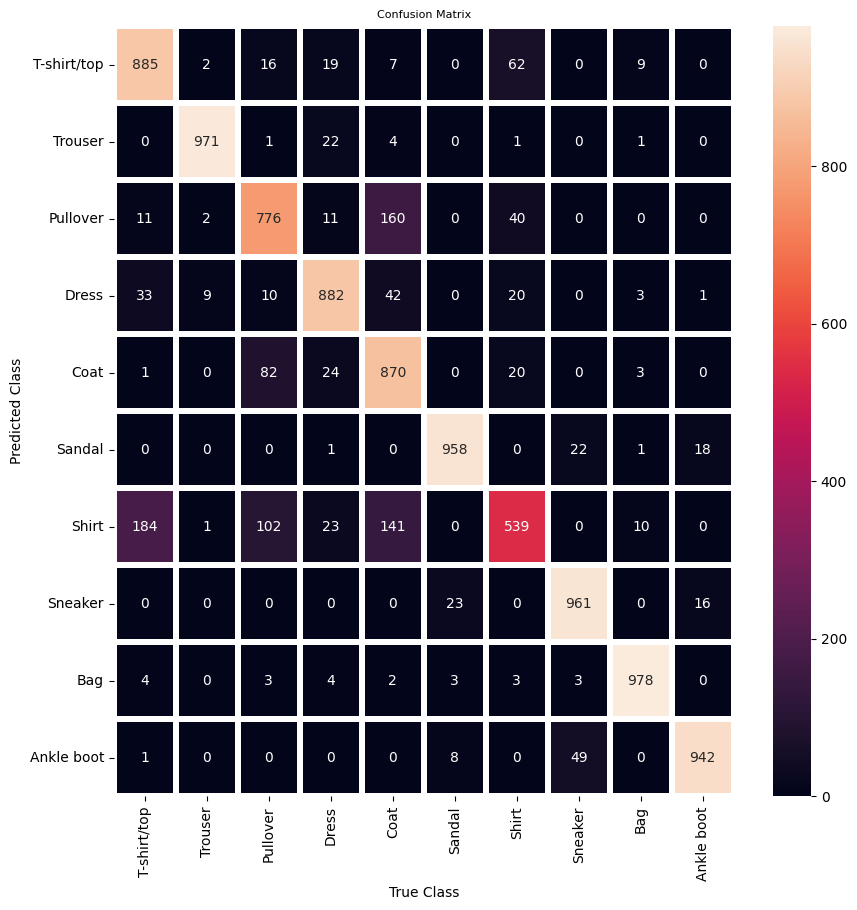

In [ ]:
plot_confusion_matrix()

print(np.sum(fashion_mnist_test_label == 0))

# **Question - 8**

In [ ]:
sweep_config_que8 = {
    'method' : 'grid',
    'metric' : { 'goal' : 'maximize', 'name' : 'Accuracy'},
    'name' : 'sweep1_crossEntropy_vs_mse_final',

    'parameters' : {
        'epochs' : {'values' : [10]},
        'activation' : {'values' : ['tanh', 'ReLU']},
        'batch_size' : {'values' : [64]},
        'optimizer' : {'values' : ['momentum', 'nag', 'nadam', 'adam', 'rmsprop', 'sgd']},
        'weight_decay': {'values': [0]},
        'hidden_layer_sizes' : {'values' : [32, 64]},
        'beta': {'values': [0.9]}, #rmsprop
        'beta1' : {'values' : [0.999]},
        'beta2': {'values': [0.999]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'initialization':{'values': ['Xavier']},
        'hidden_layers': {'values': [4, 5]},
        'loss_function' : {'values' : ['cross_entropy', 'mean_squared_error']},
        'epsilon' : {'values' : [1e-6]},
        'momentum' : {'values' : [0.9]},
        'dataset' : {'values' : ['fashion_mnist']}
    }
}

In [ ]:
sweep_id_que8 = wandb.sweep(sweep_config_que8, project="DL_Assignment1")
wandb.agent(sweep_id_que8, train)
wandb.finish()

Create sweep with ID: 2q58yqm1
Sweep URL: https://wandb.ai/harsh_cs23m026/DL_Assignment1/sweeps/2q58yqm1


wandb: Agent Starting Run: s26b0jfc with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: Currently logged in as: cs23m026 (harsh_cs23m026). Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.37004301044834303, Training-accuracy:87.01666666666667%, Validation-loss : 0.3868521803515943, Validation-accuracy:86.7%
0.3868521803515943 86.7


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.7
epoch,10
training-accuracy,87.01667
training-loss,0.37004
validation-accuracy,86.7


wandb: Agent Starting Run: qr4q2law with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3671531646200392, Training-accuracy:86.83703703703704%, Validation-loss : 0.3869842772626749, Validation-accuracy:86.06666666666666%
0.3869842772626749 86.06666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.06667
epoch,10
training-accuracy,86.83704
training-loss,0.36715
validation-accuracy,86.06667


wandb: Agent Starting Run: cixxmi6h with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.33789707745184927, Training-accuracy:87.69074074074074%, Validation-loss : 0.37534248007919585, Validation-accuracy:86.35000000000001%
0.37534248007919585 86.35000000000001


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▅▇▇▇███
training-loss,█▅▄▄▂▂▂▂▁▁
validation-accuracy,▁▅▆▅█▇▇███
validation-loss,█▄▃▃▂▂▂▂▁▁
Accuracy,86.35
epoch,10
training-accuracy,87.69074
training-loss,0.3379
validation-accuracy,86.35


wandb: Agent Starting Run: 8ogkb69s with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3931317721334665, Training-accuracy:86.40185185185186%, Validation-loss : 0.4370317083106066, Validation-accuracy:85.11666666666666%
0.4370317083106066 85.11666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇███▇
training-loss,█▅▄▃▂▂▁▁▁▂
validation-accuracy,▁▅▅▆▇▆█▇▇▇
validation-loss,█▄▃▃▂▂▁▂▂▃
Accuracy,85.11667
epoch,10
training-accuracy,86.40185
training-loss,0.39313
validation-accuracy,85.11667


wandb: Agent Starting Run: z7ewmaa9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.2940418233708421, Training-accuracy:89.33518518518518%, Validation-loss : 0.3387852279230624, Validation-accuracy:87.9%
0.3387852279230624 87.9


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▆▆▇██
training-loss,█▅▄▃▃▃▂▂▁▁
validation-accuracy,▁▄▆▇▆▆▇▇██
validation-loss,█▄▃▂▂▂▂▂▁▁
Accuracy,87.9
epoch,10
training-accuracy,89.33519
training-loss,0.29404
validation-accuracy,87.9


wandb: Agent Starting Run: pz5760xk with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6010387884625774, Training-accuracy:79.7537037037037%, Validation-loss : 0.605140155058275, Validation-accuracy:79.56666666666666%
0.605140155058275 79.56666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▅▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,79.56667
epoch,10
training-accuracy,79.7537
training-loss,0.60104
validation-accuracy,79.56667


wandb: Agent Starting Run: 4hgpf3nz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.45977811404573715, Training-accuracy:16.150000000000002%, Validation-loss : 0.46018387606804906, Validation-accuracy:15.266666666666667%
0.46018387606804906 15.266666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▄▅▆▆▇▇█
training-loss,█▆▅▅▄▃▂▂▁▁
validation-accuracy,▁▁▃▄▆▆▇▇██
validation-loss,█▆▅▄▄▃▂▂▁▁
Accuracy,15.26667
epoch,10
training-accuracy,16.15
training-loss,0.45978
validation-accuracy,15.26667


wandb: Agent Starting Run: 94n9wd6s with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.43564337364785166, Training-accuracy:20.253703703703703%, Validation-loss : 0.43294496898470347, Validation-accuracy:21.099999999999998%
0.43294496898470347 21.099999999999998


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▅▆▆▆▇█
training-loss,█▆▅▄▃▃▂▂▁▁
validation-accuracy,▁▃▄▅▅▆▆▆▇█
validation-loss,█▆▅▄▄▃▂▂▁▁
Accuracy,21.1
epoch,10
training-accuracy,20.2537
training-loss,0.43564
validation-accuracy,21.1


wandb: Agent Starting Run: c8s433cs with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.09629449443213768, Training-accuracy:86.80555555555556%, Validation-loss : 0.1011839509912072, Validation-accuracy:86.01666666666667%
0.1011839509912072 86.01666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▇▇▇▇██
training-loss,█▅▄▃▂▂▁▁▁▁
validation-accuracy,▁▃▅▆▇▇▇▇██
validation-loss,█▅▄▃▂▂▁▁▁▁
Accuracy,86.01667
epoch,10
training-accuracy,86.80556
training-loss,0.09629
validation-accuracy,86.01667


wandb: Agent Starting Run: 7g9axya0 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.09952557433437019, Training-accuracy:86.53518518518518%, Validation-loss : 0.10642462272267339, Validation-accuracy:85.63333333333333%
0.10642462272267339 85.63333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇▇██
training-loss,█▅▄▃▂▁▂▁▁▁
validation-accuracy,▁▃▅▆▇█████
validation-loss,█▅▃▃▂▁▂▁▁▁
Accuracy,85.63333
epoch,10
training-accuracy,86.53519
training-loss,0.09953
validation-accuracy,85.63333


wandb: Agent Starting Run: g607zas0 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.11986034848155087, Training-accuracy:83.41296296296296%, Validation-loss : 0.12353771408024784, Validation-accuracy:82.76666666666667%
0.12353771408024784 82.76666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▆▇▇████
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▅▆▆▇▇████
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,82.76667
epoch,10
training-accuracy,83.41296
training-loss,0.11986
validation-accuracy,82.76667


wandb: Agent Starting Run: u9a8tx7z with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.514751587932661, Training-accuracy:10.435185185185185%, Validation-loss : 0.5156139563658654, Validation-accuracy:10.75%
0.5156139563658654 10.75


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▂▃▄▅▆▆▇█
training-loss,█▇▆▅▄▄▃▂▂▁
validation-accuracy,▁▂▂▃▄▅▆▆▇█
validation-loss,█▇▆▅▄▄▃▂▂▁
Accuracy,10.75
epoch,10
training-accuracy,10.43519
training-loss,0.51475
validation-accuracy,10.75


wandb: Agent Starting Run: sxro9zyd with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6277889047418205, Training-accuracy:79.13333333333334%, Validation-loss : 0.6396883963617179, Validation-accuracy:78.4%
0.6396883963617179 78.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▆▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇▇██
validation-loss,█▆▄▃▃▂▂▁▁▁
Accuracy,78.4
epoch,10
training-accuracy,79.13333
training-loss,0.62779
validation-accuracy,78.4


wandb: Agent Starting Run: rkyyrkqm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.638272726744472, Training-accuracy:78.37962962962963%, Validation-loss : 0.6402048487727776, Validation-accuracy:78.78333333333333%
0.6402048487727776 78.78333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▆▇▇▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▅▆▇▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,78.78333
epoch,10
training-accuracy,78.37963
training-loss,0.63827
validation-accuracy,78.78333


wandb: Agent Starting Run: egpbdun0 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3501604102076993, Training-accuracy:87.42592592592592%, Validation-loss : 0.3761612760055476, Validation-accuracy:86.66666666666667%
0.3761612760055476 86.66666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇████
training-loss,█▅▄▃▂▂▁▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▃▃▂▂▁▁▁▁
Accuracy,86.66667
epoch,10
training-accuracy,87.42593
training-loss,0.35016
validation-accuracy,86.66667


wandb: Agent Starting Run: 2mdeiokk with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3719862927622253, Training-accuracy:86.50925925925927%, Validation-loss : 0.3968856221428296, Validation-accuracy:85.48333333333333%
0.3968856221428296 85.48333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▃▅▆▇▇▇▇██
validation-loss,█▅▃▃▂▂▂▁▁▁
Accuracy,85.48333
epoch,10
training-accuracy,86.50926
training-loss,0.37199
validation-accuracy,85.48333


wandb: Agent Starting Run: ek2c4eg1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3733008910840371, Training-accuracy:86.93518518518518%, Validation-loss : 0.3907319665192223, Validation-accuracy:86.36666666666667%
0.3907319665192223 86.36666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇███
validation-loss,█▅▃▃▂▂▂▁▁▁
Accuracy,86.36667
epoch,10
training-accuracy,86.93519
training-loss,0.3733
validation-accuracy,86.36667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9ceyejix with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.3983849449598036, Training-accuracy:59.0574074074074%, Validation-loss : 1.3984152542231587, Validation-accuracy:58.650000000000006%
1.3984152542231587 58.650000000000006


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▃▃▄▅▆▇██
training-loss,█▆▅▄▃▂▂▂▁▁
validation-accuracy,▁▂▃▃▄▅▆▇██
validation-loss,█▆▅▄▃▂▂▂▁▁
Accuracy,58.65
epoch,10
training-accuracy,59.05741
training-loss,1.39838
validation-accuracy,58.65


wandb: Agent Starting Run: kd8gnu6l with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5399285695338354, Training-accuracy:12.155555555555555%, Validation-loss : 0.5413734654255907, Validation-accuracy:11.55%
0.5413734654255907 11.55


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▆███▆▄▃▂▂
training-loss,█▆▅▄▃▃▂▂▁▁
validation-accuracy,▁▇█▇▆▅▂▄▄▃
validation-loss,█▆▅▄▃▃▂▂▁▁
Accuracy,11.55
epoch,10
training-accuracy,12.15556
training-loss,0.53993
validation-accuracy,11.55


wandb: Agent Starting Run: v6ynl6aj with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.49461975753583304, Training-accuracy:13.22962962962963%, Validation-loss : 0.49441652885742177, Validation-accuracy:13.4%
0.49441652885742177 13.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▃▃▄▅▆▇█
training-loss,█▇▆▅▄▃▃▂▁▁
validation-accuracy,▁▁▂▃▄▄▅▆██
validation-loss,█▇▆▅▄▃▃▂▁▁
Accuracy,13.4
epoch,10
training-accuracy,13.22963
training-loss,0.49462
validation-accuracy,13.4


wandb: Agent Starting Run: oybndya3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.09148703301193345, Training-accuracy:87.42407407407407%, Validation-loss : 0.09723182536084493, Validation-accuracy:86.71666666666667%
0.09723182536084493 86.71666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▄▃▃▂▂▁▁▁▁
validation-accuracy,▁▄▅▆▇▇████
validation-loss,█▄▃▃▂▂▁▁▁▁
Accuracy,86.71667
epoch,10
training-accuracy,87.42407
training-loss,0.09149
validation-accuracy,86.71667


wandb: Agent Starting Run: 2eebkgha with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.10044619203979169, Training-accuracy:86.1148148148148%, Validation-loss : 0.10502576374911264, Validation-accuracy:85.55%
0.10502576374911264 85.55


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▇▇▇████
training-loss,█▅▃▂▂▂▁▁▁▁
validation-accuracy,▁▄▆▇▇▇████
validation-loss,█▅▃▂▂▂▁▁▁▁
Accuracy,85.55
epoch,10
training-accuracy,86.11481
training-loss,0.10045
validation-accuracy,85.55


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ud1d0075 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


# **Question 10**

In [43]:
# Helper Function
def train_model_on_mnist(PARAM_NEURAL_NETWORK, PARAM_OPTIMIZER, batch_size, epochs):
    neural_network_mnist = Neural_Network(PARAM_NEURAL_NETWORK)
    optimizer_mnist = Optimizer(neural_network_mnist, PARAM_OPTIMIZER)

    my_model_mnist = Train_Model(neural_network_mnist, optimizer_mnist, log = 0, console = 0)
    my_model_mnist.fit_data(batch_size, epochs)
    loss, accuracy = my_model_mnist.compute_performance(my_model_mnist.neural_network.test_img, my_model_mnist.neural_network.test_true)
    print(f"Test Data Loss : {loss}, Test Data Accuracy : {accuracy}")

# Model-1

In [24]:
MODEL1_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 3,
    "hidden_layer_sizes" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL1_PARAM_OPTIMIZER = {
    "eta": 0.005,
    "optimizer": "sgd", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 1e-8,
    "epsilon": 1e-6,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}


# Model - 2

In [25]:
MODEL2_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 3,
    "hidden_layer_sizes" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL2_PARAM_OPTIMIZER = {
    "eta": 0.001,
    "optimizer": "momentum", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}


# Model - 3

In [38]:
MODEL3_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 4,
    "hidden_layer_sizes" : 64,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL3_PARAM_OPTIMIZER = {
    "eta": 0.001,
    "optimizer": "rmsprop", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}

# Test Loss & Test Accuracy on MNIST_DATASET

In [44]:
train_model_on_mnist(MODEL1_PARAM_NEURAL_NETWORK, MODEL1_PARAM_OPTIMIZER, 32, 1)
train_model_on_mnist(MODEL2_PARAM_NEURAL_NETWORK, MODEL2_PARAM_OPTIMIZER, 32, 1)
train_model_on_mnist(MODEL3_PARAM_NEURAL_NETWORK, MODEL3_PARAM_OPTIMIZER, 32, 1)


Test Data Loss : 0.4860293784931562, Test Data Accuracy : 87.03
Test Data Loss : 0.3263826535866095, Test Data Accuracy : 90.19
Test Data Loss : 0.16940353262169427, Test Data Accuracy : 95.07
